## Predicting Microsoft and Amazon call option price

Using Black Scholes Merton formula through monte carlo simulation

In [42]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [43]:
stocks = [ 'AMZN', 'MSFT']
data = pd.DataFrame()
for i in range(len(stocks)):
    
    df = wb.DataReader(stocks[i], data_source='yahoo', start='2015-5-1', end = '2020-5-1')
    df['stock'] = stocks[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,AMZN,MSFT
Date,,
2015-05-01,422.869995,43.754124
2015-05-04,423.040009,43.376461
2015-05-05,421.190002,42.800987
2015-05-06,419.100006,41.614067
2015-05-07,426.880005,41.991734


In [44]:
log_returns = np.log(1 + table.pct_change())
log_returns.tail()

,AMZN,MSFT
Date,,
2020-04-27,-0.014300,-0.002869
2020-04-28,-0.026406,-0.024662
2020-04-29,0.025021,0.043896
2020-04-30,0.041804,0.009982
2020-05-01,-0.079015,-0.026232


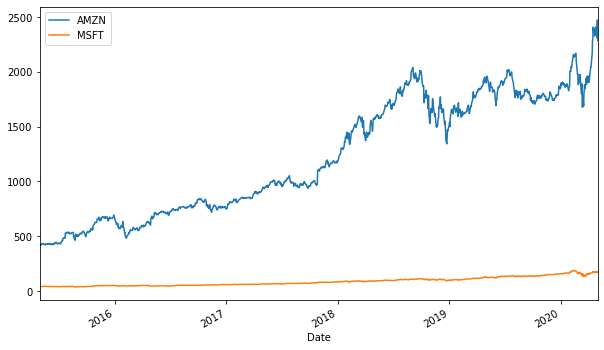

In [45]:
table.plot(figsize=(10, 6));

 - 10 Year Treasury Rate: 0.73% for May 2020 (rf = 0.0073)
 - Risk premium = 0.05


In [46]:
stdev = log_returns.std() * 250 ** 0.5
stdev = stdev.values
stdev

array([0.29631127, 0.27188346])

In [47]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  
rf = 0.0073

Euler's Discretization

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

Monte carlo simulations can provide us with thousands of possible call options prices

We could average the payoff and discount it back to today

### AMAZON stock prediction

In [48]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = table.AMZN.iloc[-1]
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((rf - 0.5 * stdev[0] ** 2) * delta_t + stdev[0] * delta_t ** 0.5 * Z[t])

In [49]:
S

array([[2286.04003906, 2286.04003906, 2286.04003906, ..., 2286.04003906,
        2286.04003906, 2286.04003906],
       [2265.17583237, 2228.75083277, 2458.02321896, ..., 2403.24065389,
        2278.03083381, 2326.95702298],
       [2254.00668454, 2270.2083736 , 2498.71356038, ..., 2347.77455916,
        2272.47864798, 2347.62494101],
       ...,
       [2858.3956116 , 1692.74704875, 2838.97704614, ..., 1529.15630743,
        2145.60408519, 2427.23231323],
       [2787.50938498, 1768.68050136, 2807.75292069, ..., 1511.12340247,
        2177.34217785, 2405.55422637],
       [2762.15085948, 1798.6328204 , 2776.03315121, ..., 1540.04763064,
        2234.32308074, 2348.81609114]])

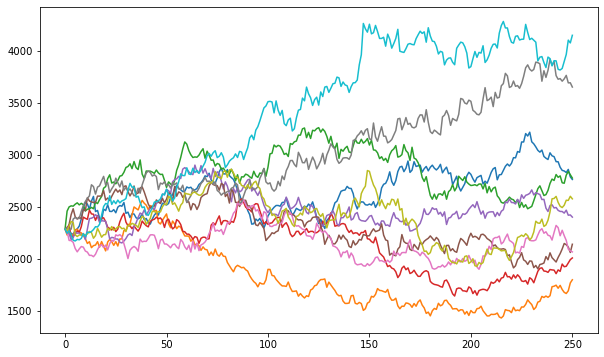

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

Calculating price of call option

$$
C = \frac{exp(-r \cdot T) \cdot \sum{p_i}}{iterations}
$$

In [51]:
p = np.maximum(S[-1] - 110, 0)
C = np.exp(-rf * T) * np.sum(p) / iterations
C  

2186.423069654273

In [52]:
S0 #latest stock price

2286.0400390625

### Microsoft stock prediction

In [53]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = table.MSFT.iloc[-1]
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((rf - 0.5 * stdev[1] ** 2) * delta_t + stdev[1] * delta_t ** 0.5 * Z[t])

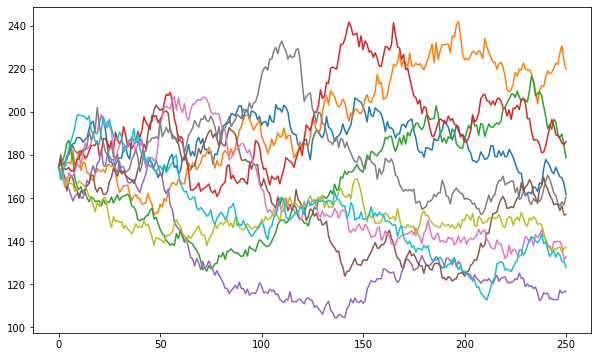

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [55]:
p = np.maximum(S[-1] - 110, 0)
C = np.exp(-rf * T) * np.sum(p) / iterations
C  

64.7436699629479

In [56]:
S0 #latest stock price

174.08517456054688